In [30]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.impute import KNNImputer
import time

In [2]:
df = pd.read_csv("./grib_data.csv")
df

,time,latitude,longitude,number,step,surface,valid_time,u100,v100,u10n,...,stl1,slt,sdfor,sdor,sp,tsn,tcc,tciw,tclw,tco3
0,2024-01-01 01:00:00,37.24,68.17,0,0 days,0.0,2024-01-01 01:00:00,-2.245291,-0.776336,-0.399831,...,277.32510,2.0,110.161500,127.059630,96868.280,273.15945,0.000000,0.000000,0.000000,0.007600
1,2024-01-01 01:00:00,37.24,68.42,0,0 days,0.0,2024-01-01 01:00:00,-2.133474,-1.552703,-0.324147,...,277.53604,2.0,83.488040,96.797850,97332.280,273.15945,0.000000,0.000000,0.000000,0.007598
2,2024-01-01 01:00:00,37.24,68.67,0,0 days,0.0,2024-01-01 01:00:00,-2.347830,-1.889617,-0.607595,...,278.08292,2.0,46.477905,67.010254,97679.280,273.15945,0.000000,0.000000,0.000000,0.007593
3,2024-01-01 01:00:00,37.24,68.92,0,0 days,0.0,2024-01-01 01:00:00,-2.571707,-1.820525,-1.247975,...,278.70108,2.0,46.584840,83.773865,96807.280,273.15945,0.000000,0.000000,0.000000,0.007574
4,2024-01-01 01:00:00,37.24,69.17,0,0 days,0.0,2024-01-01 01:00:00,-2.128103,-1.222381,-1.059499,...,278.15323,2.0,90.897644,142.714780,95726.280,273.15945,0.000000,0.000000,0.000000,0.007550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359770,2024-01-25 01:00:00,6.74,96.17,0,0 days,0.0,2024-01-25 01:00:00,-7.954626,1.877813,-7.370322,...,302.32285,0.0,0.000000,0.000000,101354.625,302.32147,0.995026,0.025742,0.048691,0.005177
359771,2024-01-25 01:00:00,6.74,96.42,0,0 days,0.0,2024-01-25 01:00:00,-8.257360,1.642462,-7.607627,...,302.24570,0.0,0.000000,0.000000,101350.625,302.24530,0.991486,0.018448,0.040695,0.005175
359772,2024-01-25 01:00:00,6.74,96.67,0,0 days,0.0,2024-01-25 01:00:00,-8.735876,1.420294,-7.974814,...,302.26132,0.0,0.000000,0.000000,101356.625,302.26093,0.986694,0.017120,0.035782,0.005170
359773,2024-01-25 01:00:00,6.74,96.92,0,0 days,0.0,2024-01-25 01:00:00,-9.272009,1.280645,-8.406699,...,302.20468,0.0,0.000000,0.000000,101340.625,302.20428,0.990692,0.014809,0.038086,0.005168


In [3]:
df_conjugate = df.copy()
df_conjugate

,time,latitude,longitude,number,step,surface,valid_time,u100,v100,u10n,...,stl1,slt,sdfor,sdor,sp,tsn,tcc,tciw,tclw,tco3
0,2024-01-01 01:00:00,37.24,68.17,0,0 days,0.0,2024-01-01 01:00:00,-2.245291,-0.776336,-0.399831,...,277.32510,2.0,110.161500,127.059630,96868.280,273.15945,0.000000,0.000000,0.000000,0.007600
1,2024-01-01 01:00:00,37.24,68.42,0,0 days,0.0,2024-01-01 01:00:00,-2.133474,-1.552703,-0.324147,...,277.53604,2.0,83.488040,96.797850,97332.280,273.15945,0.000000,0.000000,0.000000,0.007598
2,2024-01-01 01:00:00,37.24,68.67,0,0 days,0.0,2024-01-01 01:00:00,-2.347830,-1.889617,-0.607595,...,278.08292,2.0,46.477905,67.010254,97679.280,273.15945,0.000000,0.000000,0.000000,0.007593
3,2024-01-01 01:00:00,37.24,68.92,0,0 days,0.0,2024-01-01 01:00:00,-2.571707,-1.820525,-1.247975,...,278.70108,2.0,46.584840,83.773865,96807.280,273.15945,0.000000,0.000000,0.000000,0.007574
4,2024-01-01 01:00:00,37.24,69.17,0,0 days,0.0,2024-01-01 01:00:00,-2.128103,-1.222381,-1.059499,...,278.15323,2.0,90.897644,142.714780,95726.280,273.15945,0.000000,0.000000,0.000000,0.007550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359770,2024-01-25 01:00:00,6.74,96.17,0,0 days,0.0,2024-01-25 01:00:00,-7.954626,1.877813,-7.370322,...,302.32285,0.0,0.000000,0.000000,101354.625,302.32147,0.995026,0.025742,0.048691,0.005177
359771,2024-01-25 01:00:00,6.74,96.42,0,0 days,0.0,2024-01-25 01:00:00,-8.257360,1.642462,-7.607627,...,302.24570,0.0,0.000000,0.000000,101350.625,302.24530,0.991486,0.018448,0.040695,0.005175
359772,2024-01-25 01:00:00,6.74,96.67,0,0 days,0.0,2024-01-25 01:00:00,-8.735876,1.420294,-7.974814,...,302.26132,0.0,0.000000,0.000000,101356.625,302.26093,0.986694,0.017120,0.035782,0.005170
359773,2024-01-25 01:00:00,6.74,96.92,0,0 days,0.0,2024-01-25 01:00:00,-9.272009,1.280645,-8.406699,...,302.20468,0.0,0.000000,0.000000,101340.625,302.20428,0.990692,0.014809,0.038086,0.005168


In [4]:
import pandas as pd

column_mapping = {
    'u100': '100m u-component of wind',
    'v100': '100m v-component of wind',
    'u10n': '10m u-component of neutral wind',
    'u10': '10m u-component of wind',
    'v10n': '10m v-component of neutral wind',
    'v10': '10m v-component of wind',
    'd2m': '2m dewpoint temperature',
    't2m': '2m temperature',
    'meanSea': 'Air density over the oceans',
    'anor': 'Angle of sub-gridscale orography',
    'isor': 'Anisotropy of sub-gridscale orography',
    'blh': 'Boundary layer height',
    'cape': 'Convective available potential energy',
    'fal': 'Convective inhibition',
    'flsr': 'Convective precipitation',
    'fsr': 'Convective rainfall rate',
    'z': 'Geopotential',
    'hcc': 'High cloud cover',
    'cvh': 'High vegetation cover',
    'depthBelowLandLayer': 'Ice temperature layer 1',
    'istl1': 'Ice temperature layer 2',
    'iews': 'Ice temperature layer 3',
    'ie': 'Ice temperature layer 4',
    'inss': 'Instantaneous 10m wind gust',
    'ishf': 'Instantaneous eastward turbulent surface stress',
    'lblt': 'Instantaneous large-scale surface precipitation fraction',
    'cl': 'Instantaneous moisture flux',
    'dl': 'Instantaneous northward turbulent surface stress',
    'licd': 'Instantaneous surface sensible heat flux',
    'lict': 'K index',
    'lmld': 'Lake bottom temperature',
    'lmlt': 'Lake cover',
    'lshf': 'Lake depth',
    'ltlt': 'Lake ice depth',
    'lsm': 'Lake ice temperature',
    'lai_hv': 'Lake mix-layer depth',
    'lai_lv': 'Lake mix-layer temperature',
    'lcc': 'Lake shape factor',
    'cvl': 'Lake total layer temperature',
    'msl': 'Land-sea mask',
    'mcc': 'Large-scale rain rate',
    'alnid': 'Large-scale snowfall rate water equivalent',
    'alnip': 'Large-scale precipitation',
    'siconc': 'Sea-ice cover',
    'sst': 'Sea surface temperature',
    'src': 'Significant height of combined wind waves and swell',
    'skt': 'Significant height of total swell',
    'slor': 'Significant height of wind waves',
    'asn': 'Significant wave height of first swell partition',
    'rsn': 'Significant wave height of second swell partition',
    'sd': 'Significant wave height of third swell partition',
    'stl1': 'Skin reservoir content',
    'sl': 'Skin temperature',
    'sdfor': 'Slope of sub-gridscale orography',
    'sdor': 'Snow albedo',
    'sp': 'Snow density',
    'tsn': 'Snow depth',
    'tcc': 'Snow evaporation',
    'tciw': 'Snowfall',
    'tclw': 'Snowmelt',
    'tco3': 'Soil temperature level 1',
    'siconc': 'Soil temperature level 2',
    'sst': 'Soil temperature level 3',
    'src': 'Soil temperature level 4',
    'skt': 'Soil type',
    'slor': 'Standard deviation of filtered subgrid orography',
    'asn': 'Standard deviation of orography',
    'rsn': 'Sub-surface runoff',
    'sd': 'Surface latent heat flux',
    'stl1': 'Surface net solar radiation',
    'sl': 'Surface net thermal radiation',
    'sdfor': 'Surface pressure',
    'sdor': 'Surface runoff',
    'sp': 'Surface sensible heat flux',
    'tsn': 'Surface solar radiation downward',
    'tcc': 'Surface thermal radiation downward',
    'tciw': 'Top net solar radiation',
    'tclw': 'Top net thermal radiation',
    'tco3': 'Total cloud cover',
    'siconc': 'Total column cloud ice water',
    'sst': 'Total column cloud liquid water',
    'src': 'Total column ozone',
    'skt': 'Total column rain water',
    'slor': 'Total column snow water',
    'asn': 'Total column supercooled liquid water',
    'rsn': 'Total column water',
    'sd': 'Total column water vapour',
    'stl1': 'Total precipitation',
    'sl': 'Total sky direct solar radiation at surface',
    'sdfor': 'Total totals index',
    'sdor': 'Trapping layer base height',
    'sp': 'Trapping layer top height',
    'tsn': 'Type of high vegetation',
    'tcc': 'Type of low vegetation',
    'tciw': 'U-component stokes drift',
    'tclw': 'UV visible albedo for diffuse radiation',
    'tco3': 'UV visible albedo for direct radiation',
    'siconc': 'V-component stokes drift',
    'sst': 'Vertical integral of divergence of cloud frozen water flux',
    'src': 'Vertical integral of divergence of cloud liquid water flux',
    'skt': 'Vertical integral of divergence of geopotential flux',
    'slor': 'Vertical integral of divergence of kinetic energy flux',
    'asn': 'Vertical integral of divergence of mass flux',
    'rsn': 'Vertical integral of divergence of moisture flux',
    'sd': 'Vertical integral of divergence of ozone flux',
    'stl1': 'Vertical integral of divergence of thermal energy flux',
    'sl': 'Vertical integral of divergence of total energy flux',
    'sdfor': 'Vertical integral of eastward cloud frozen water flux',
    'sdor': 'Vertical integral of eastward cloud liquid water flux',
    'sp': 'Vertical integral of eastward geopotential flux',
    'tsn': 'Vertical integral of eastward heat flux',
    'tcc': 'Vertical integral of eastward kinetic energy flux',
    'tciw': 'Vertical integral of eastward mass flux',
    'tclw': 'Vertical integral of eastward ozone flux',
    'tco3': 'Vertical integral of eastward total energy flux',
    'siconc': 'Vertical integral of eastward water vapour flux',
    'sst': 'Vertical integral of energy conversion',
    'src': 'Vertical integral of kinetic energy',
    'skt': 'Vertical integral of mass of atmosphere',
    'slor': 'Vertical integral of mass tendency',
    'asn': 'Vertical integral of northward cloud frozen water flux',
    'rsn': 'Vertical integral of northward cloud liquid water flux',
    'sd': 'Vertical integral of northward geopotential flux',
    'stl1': 'Vertical integral of northward heat flux',
    'sl': 'Vertical integral of northward kinetic energy flux',
    'sdfor': 'Vertical integral of northward mass flux',
    'sdor': 'Vertical integral of northward ozone flux',
    'sp': 'Vertical integral of northward total energy flux',
    'tsn': 'Vertical integral of northward water vapour flux',
    'tcc': 'Vertical integral of potential and internal energy',
    'tciw': 'Vertical integral of potential, internal and latent energy',
    'tclw': 'Vertical integral of temperature',
    'tco3': 'Vertical integral of thermal energy',
    'siconc': 'Vertical integral of total energy',
    'sst': 'Volumetric soil water layer 1',
    'src': 'Volumetric soil water layer 2',
    'skt': 'Volumetric soil water layer 3',
    'slor': 'Volumetric soil water layer 4',
    'asn': 'Water availability',
    'rsn': 'Water storage',
    'sd': 'Water table',
    'stl1': 'Wind gust',
    'sl': 'Wind speed',
    'sdfor': 'Windspeed',
    'sdor': 'Zonal wind component',
    'sp': 'Zonal wind speed',
}

df_conjugate.rename(columns=column_mapping, inplace=True)
df_conjugate

,time,latitude,longitude,number,step,surface,valid_time,100m u-component of wind,100m v-component of wind,10m u-component of neutral wind,...,Wind gust,slt,Windspeed,Zonal wind component,Zonal wind speed,Vertical integral of northward water vapour flux,Vertical integral of potential and internal energy,"Vertical integral of potential, internal and latent energy",Vertical integral of temperature,Vertical integral of thermal energy
0,2024-01-01 01:00:00,37.24,68.17,0,0 days,0.0,2024-01-01 01:00:00,-2.245291,-0.776336,-0.399831,...,277.32510,2.0,110.161500,127.059630,96868.280,273.15945,0.000000,0.000000,0.000000,0.007600
1,2024-01-01 01:00:00,37.24,68.42,0,0 days,0.0,2024-01-01 01:00:00,-2.133474,-1.552703,-0.324147,...,277.53604,2.0,83.488040,96.797850,97332.280,273.15945,0.000000,0.000000,0.000000,0.007598
2,2024-01-01 01:00:00,37.24,68.67,0,0 days,0.0,2024-01-01 01:00:00,-2.347830,-1.889617,-0.607595,...,278.08292,2.0,46.477905,67.010254,97679.280,273.15945,0.000000,0.000000,0.000000,0.007593
3,2024-01-01 01:00:00,37.24,68.92,0,0 days,0.0,2024-01-01 01:00:00,-2.571707,-1.820525,-1.247975,...,278.70108,2.0,46.584840,83.773865,96807.280,273.15945,0.000000,0.000000,0.000000,0.007574
4,2024-01-01 01:00:00,37.24,69.17,0,0 days,0.0,2024-01-01 01:00:00,-2.128103,-1.222381,-1.059499,...,278.15323,2.0,90.897644,142.714780,95726.280,273.15945,0.000000,0.000000,0.000000,0.007550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359770,2024-01-25 01:00:00,6.74,96.17,0,0 days,0.0,2024-01-25 01:00:00,-7.954626,1.877813,-7.370322,...,302.32285,0.0,0.000000,0.000000,101354.625,302.32147,0.995026,0.025742,0.048691,0.005177
359771,2024-01-25 01:00:00,6.74,96.42,0,0 days,0.0,2024-01-25 01:00:00,-8.257360,1.642462,-7.607627,...,302.24570,0.0,0.000000,0.000000,101350.625,302.24530,0.991486,0.018448,0.040695,0.005175
359772,2024-01-25 01:00:00,6.74,96.67,0,0 days,0.0,2024-01-25 01:00:00,-8.735876,1.420294,-7.974814,...,302.26132,0.0,0.000000,0.000000,101356.625,302.26093,0.986694,0.017120,0.035782,0.005170
359773,2024-01-25 01:00:00,6.74,96.92,0,0 days,0.0,2024-01-25 01:00:00,-9.272009,1.280645,-8.406699,...,302.20468,0.0,0.000000,0.000000,101340.625,302.20428,0.990692,0.014809,0.038086,0.005168


In [5]:
print(df_conjugate.dtypes)

time                                                           object
latitude                                                      float64
longitude                                                     float64
number                                                          int64
step                                                           object
                                                               ...   
Vertical integral of northward water vapour flux              float64
Vertical integral of potential and internal energy            float64
Vertical integral of potential, internal and latent energy    float64
Vertical integral of temperature                              float64
Vertical integral of thermal energy                           float64
Length: 70, dtype: object


In [7]:
df_conjugate.head()

,time,latitude,longitude,number,step,surface,valid_time,100m u-component of wind,100m v-component of wind,10m u-component of neutral wind,...,Wind gust,slt,Windspeed,Zonal wind component,Zonal wind speed,Vertical integral of northward water vapour flux,Vertical integral of potential and internal energy,"Vertical integral of potential, internal and latent energy",Vertical integral of temperature,Vertical integral of thermal energy
0,2024-01-01 01:00:00,37.24,68.17,0,0 days,0.0,2024-01-01 01:00:00,-2.245291,-0.776336,-0.399831,...,277.32510,2.0,110.161500,127.059630,96868.28,273.15945,0.0,0.0,0.0,0.007600
1,2024-01-01 01:00:00,37.24,68.42,0,0 days,0.0,2024-01-01 01:00:00,-2.133474,-1.552703,-0.324147,...,277.53604,2.0,83.488040,96.797850,97332.28,273.15945,0.0,0.0,0.0,0.007598
2,2024-01-01 01:00:00,37.24,68.67,0,0 days,0.0,2024-01-01 01:00:00,-2.347830,-1.889617,-0.607595,...,278.08292,2.0,46.477905,67.010254,97679.28,273.15945,0.0,0.0,0.0,0.007593
3,2024-01-01 01:00:00,37.24,68.92,0,0 days,0.0,2024-01-01 01:00:00,-2.571707,-1.820525,-1.247975,...,278.70108,2.0,46.584840,83.773865,96807.28,273.15945,0.0,0.0,0.0,0.007574
4,2024-01-01 01:00:00,37.24,69.17,0,0 days,0.0,2024-01-01 01:00:00,-2.128103,-1.222381,-1.059499,...,278.15323,2.0,90.897644,142.714780,95726.28,273.15945,0.0,0.0,0.0,0.007550


In [32]:
start = time.time()

data = df_conjugate.copy()

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Scale numeric data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))

data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=[np.number]).columns, index=data.index)

# Impute missing values in the scaled data
imputer = SimpleImputer(strategy='mean')
data_scaled_imputed = imputer.fit_transform(data_scaled)

data_scaled_imputed = pd.DataFrame(data_scaled_imputed, columns=data_scaled.columns, index=data_scaled.index)

# Perform PCA to retain 95% of variance
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_scaled_imputed)

data_pca = pd.DataFrame(data_pca, index=data.index)

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(data_pca)

# Predict anomalies and calculate scores
data['anomaly'] = model.predict(data_pca)
data['anomaly_score'] = model.decision_function(data_pca)

# Calculate confidence score
data['confidence_score'] = (data['anomaly_score'] - data['anomaly_score'].min()) / (data['anomaly_score'].max() - data['anomaly_score'].min())

# Identify top anomalies
anomalies = data[data['anomaly'] == -1]

if 'longitude' in data.columns and 'latitude' in data.columns:
    top_anomalies = anomalies.groupby(['longitude', 'latitude']).apply(lambda x: x.loc[x['anomaly_score'].idxmin()])

top_anomalies = top_anomalies.reset_index(drop=True)

# Create map if latitude and longitude are available
if 'longitude' in top_anomalies.columns and 'latitude' in top_anomalies.columns:
    map_center = [top_anomalies['latitude'].mean(), top_anomalies['longitude'].mean()]
    anomaly_map = folium.Map(location=map_center, zoom_start=5)

    for _, row in top_anomalies.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Anomaly Score: {row['anomaly_score']}\nConfidence: {row['confidence_score']:.2f}",
            icon=folium.Icon(color='red')
        ).add_to(anomaly_map)

    anomaly_map.save('anomaly_map.html')

# Print the top anomalies
print(top_anomalies.head(10))

# Determine root cause variables
concerning_vars = {}
for index, row in top_anomalies.iterrows():
    deviations = np.abs(data_scaled_imputed.loc[row.name] - data_scaled_imputed.mean())
    concerning_vars[row.name] = deviations.idxmax()

root_cause_frequency = pd.Series(concerning_vars).value_counts()

# Print the most concerning variables for each anomaly
for anomaly_index, var in concerning_vars.items():
    print(f"Anomaly at index {anomaly_index} has the highest deviation in variable: {var}")

print(f"\nExecution time: {time.time() - start:.2f} seconds")


C:\Users\shree\AppData\Local\Temp\ipykernel_24492\3552483745.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\shree\AppData\Local\Temp\ipykernel_24492\3552483745.py:45: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_anomalies = anomalies.groupby(['longitude', 'latitude']).apply(lambda x: x.loc[x['anomaly_score'].idxmin()])


                  time  latitude  longitude  number    step  surface  \
0  2024-01-03 01:00:00      7.74      68.17       0  0 days      0.0   
1  2024-01-03 01:00:00      7.99      68.17       0  0 days      0.0   
2  2024-01-03 01:00:00      8.24      68.17       0  0 days      0.0   
3  2024-01-03 01:00:00      8.49      68.17       0  0 days      0.0   
4  2024-01-02 01:00:00     10.24      68.17       0  0 days      0.0   
5  2024-01-08 01:00:00     34.24      68.17       0  0 days      0.0   
6  2024-01-08 01:00:00     34.49      68.17       0  0 days      0.0   
7  2024-01-08 01:00:00     34.74      68.17       0  0 days      0.0   
8  2024-01-03 01:00:00      7.74      68.42       0  0 days      0.0   
9  2024-01-03 01:00:00      7.99      68.42       0  0 days      0.0   

            valid_time  100m u-component of wind  100m v-component of wind  \
0  2024-01-03 01:00:00                 -2.736775                 -1.445342   
1  2024-01-03 01:00:00                 -2.825398   

C:\Users\shree\AppData\Local\Temp\ipykernel_24492\4159697706.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=root_cause_frequency.index, y=root_cause_frequency.values, palette='viridis')


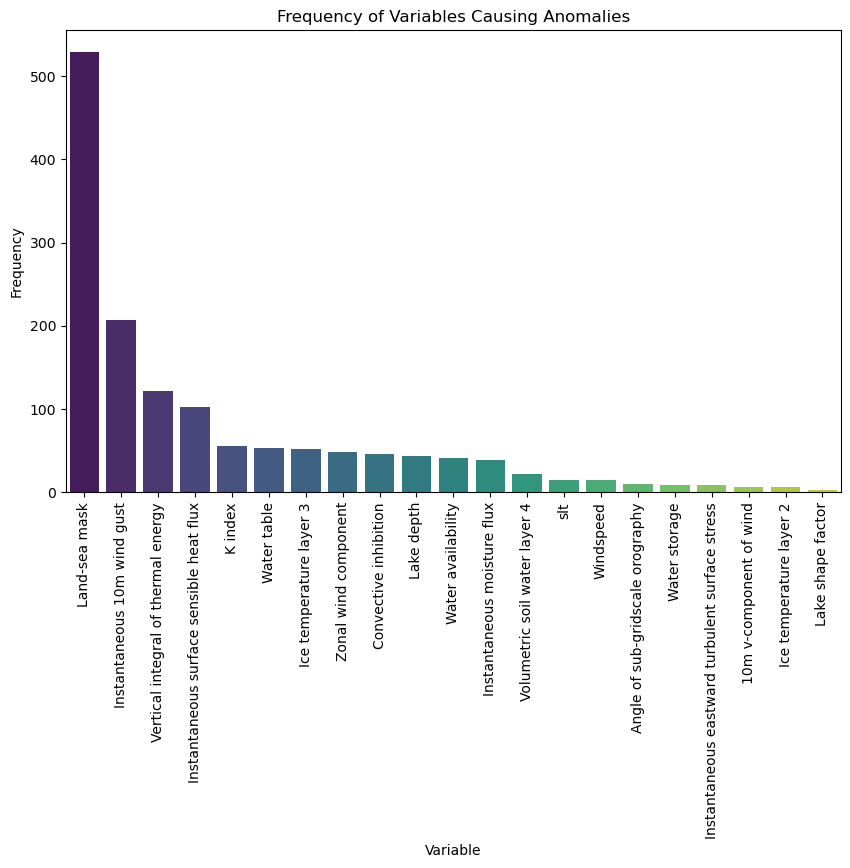

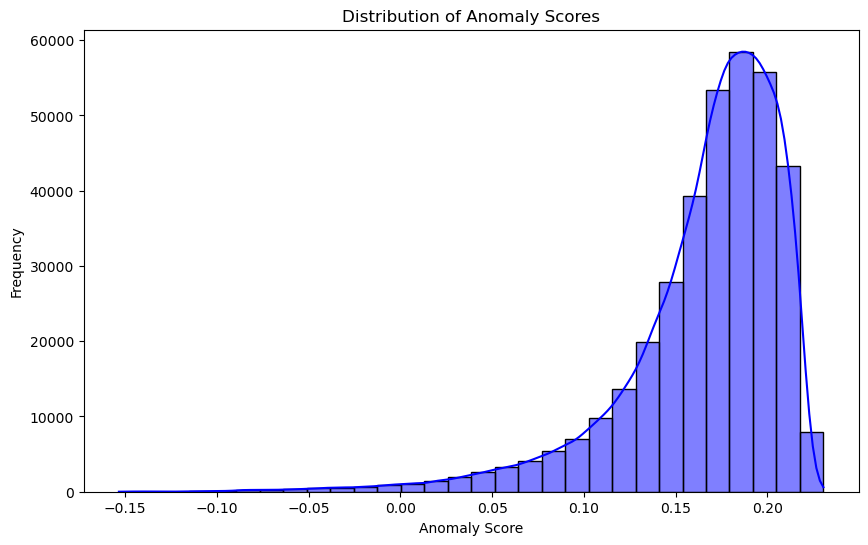

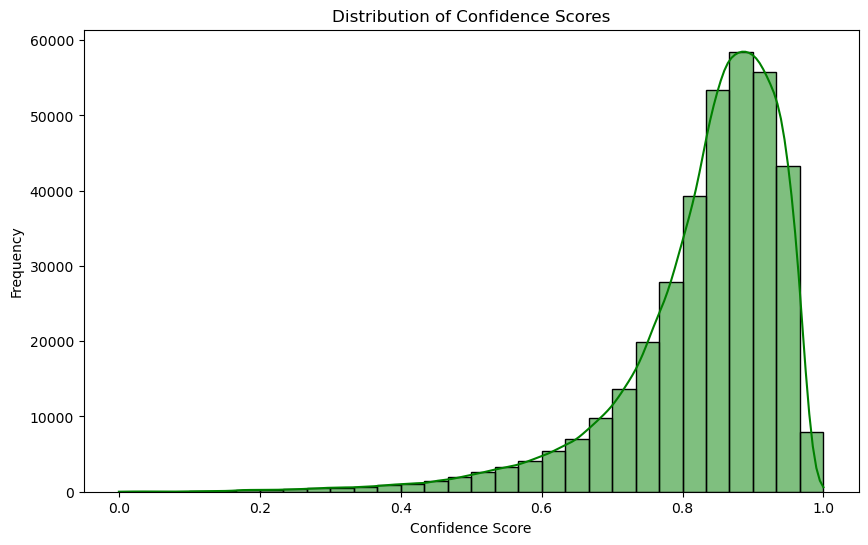

Top 5 Anomalies and Their Locations:
        longitude  latitude  anomaly_score  confidence_score
127673      74.67     10.49      -0.153458          0.000000
127556      74.67     10.74      -0.147178          0.016355
127675      75.17     10.49      -0.146612          0.017829
70577       74.67      9.49      -0.146497          0.018127
127674      74.92     10.49      -0.145988          0.019453


In [34]:
# Plot root cause frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=root_cause_frequency.index, y=root_cause_frequency.values, palette='viridis')
plt.title('Frequency of Variables Causing Anomalies')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Plot anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(data['anomaly_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Plot confidence scores
plt.figure(figsize=(10, 6))
sns.histplot(data['confidence_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

# Top 5 anomalies and their locations
top_5_anomalies = anomalies.nsmallest(5, 'anomaly_score')
print("Top 5 Anomalies and Their Locations:")
print(top_5_anomalies[['longitude', 'latitude', 'anomaly_score', 'confidence_score']])

# Plot top 5 anomalies on a map
if 'longitude' in top_5_anomalies.columns and 'latitude' in top_5_anomalies.columns:
    map_center_top_5 = [top_5_anomalies['latitude'].mean(), top_5_anomalies['longitude'].mean()]
    top_5_anomaly_map = folium.Map(location=map_center_top_5, zoom_start=5)

    for _, row in top_5_anomalies.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Anomaly Score: {row['anomaly_score']}\nConfidence: {row['confidence_score']:.2f}",
            icon=folium.Icon(color='blue')
        ).add_to(top_5_anomaly_map)

    top_5_anomaly_map.save('top_5_anomaly_map.html')


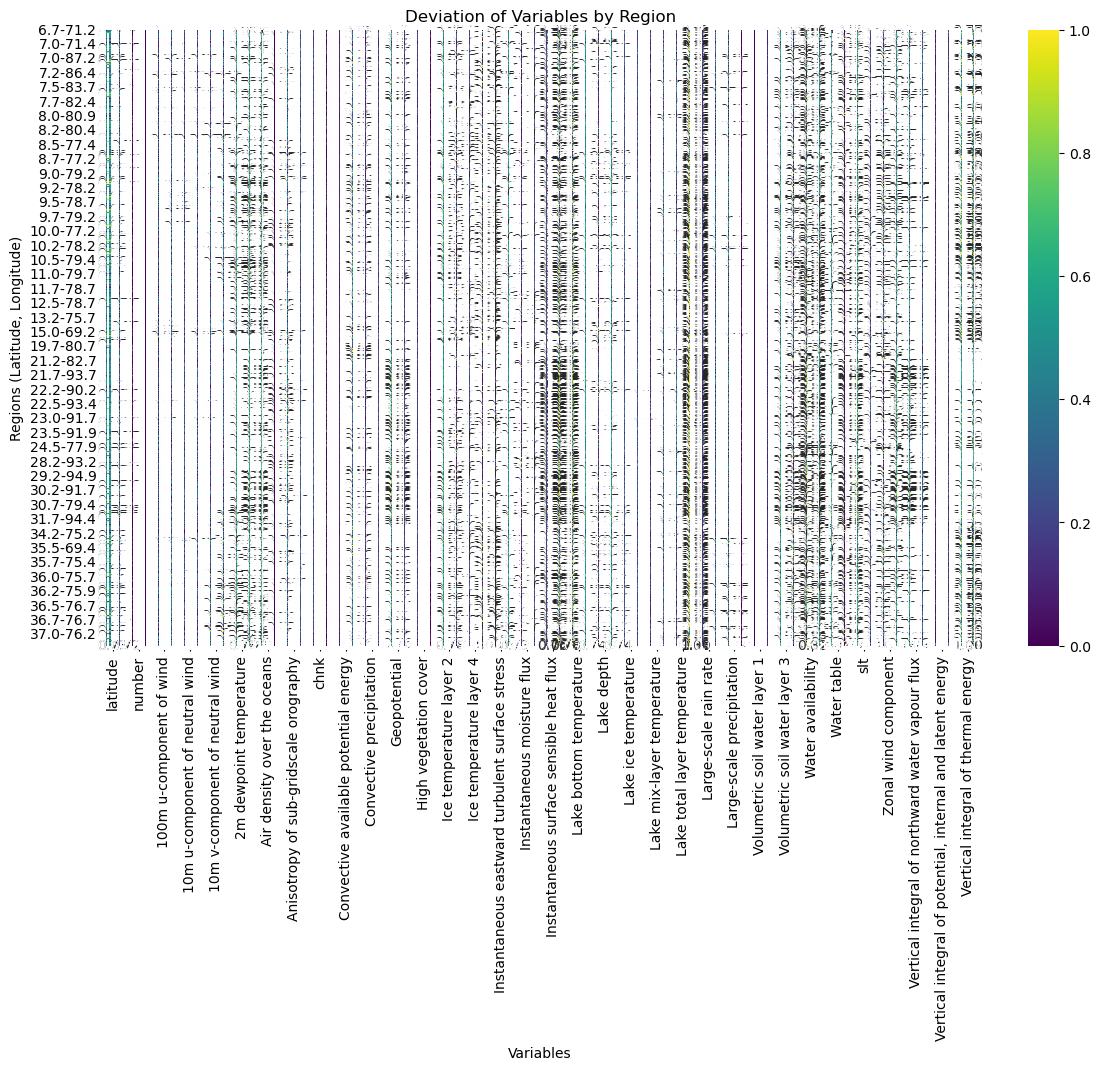

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'top_anomalies' DataFrame and 'data_scaled_imputed' DataFrame are available from the previous steps

# Define a function to group anomalies by region
def group_by_region(lat, lon, precision=1):
    return (round(lat, precision), round(lon, precision))

# Add a 'region' column to the top_anomalies DataFrame
top_anomalies['region'] = top_anomalies.apply(lambda x: group_by_region(x['latitude'], x['longitude']), axis=1)

# Initialize a dictionary to store deviation information by region
region_deviation = {}

# Calculate the deviation for each region
for region, group in top_anomalies.groupby('region'):
    deviations = np.abs(data_scaled_imputed.loc[group.index] - data_scaled_imputed.mean())
    mean_deviation = deviations.mean(axis=0)  # Mean deviation for the region across all anomalies
    region_deviation[region] = mean_deviation

# Convert the region_deviation dictionary to a DataFrame
region_deviation_df = pd.DataFrame(region_deviation).T

# Normalize the deviations for better visualization
region_deviation_df = region_deviation_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=1)

# Plotting the deviation per region
plt.figure(figsize=(14, 8))
sns.heatmap(region_deviation_df, cmap='viridis', annot=True, fmt='.2f')
plt.title('Deviation of Variables by Region')
plt.xlabel('Variables')
plt.ylabel('Regions (Latitude, Longitude)')
plt.show()

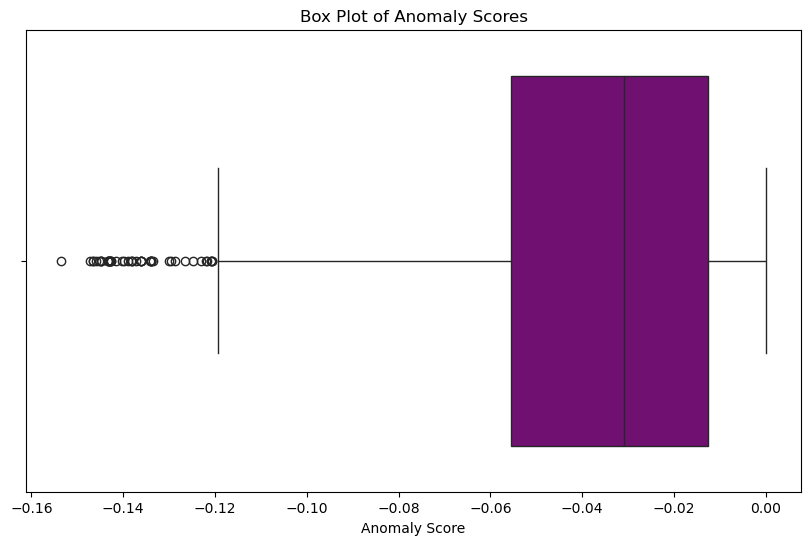

In [36]:
# Box plot of anomaly scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=anomalies['anomaly_score'], color='purple')
plt.title('Box Plot of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.show()

C:\Users\shree\AppData\Local\Temp\ipykernel_24492\1443683016.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=anomalies['longitude'], y=anomalies['latitude'], cmap='Reds', shade=True, bw_adjust=0.5)


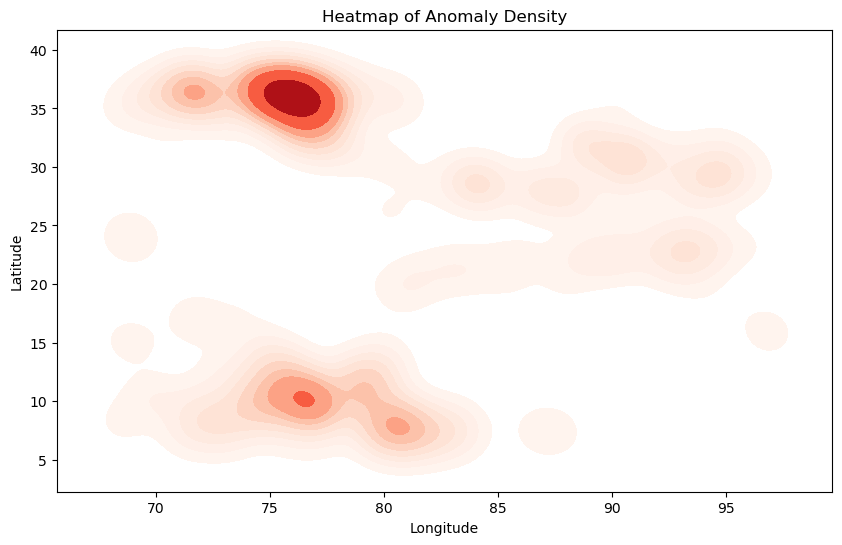

In [38]:
# Heatmap of anomaly density
if 'longitude' in anomalies.columns and 'latitude' in anomalies.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(x=anomalies['longitude'], y=anomalies['latitude'], cmap='Reds', shade=True, bw_adjust=0.5)
    plt.title('Heatmap of Anomaly Density')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()